# Linear Models

In [1]:
import numpy as np
import seaborn as sns

In [2]:
np.random.seed(1)

Generate dataset

In [3]:
def linear_func(x):
    target_k = 5
    target_b = -2
    return target_k * x + target_b

In [4]:
xes = np.linspace(0,1,11)
print(xes)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [5]:
target_ys = np.array([linear_func(x) for x in xes])
print(target_ys)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]


In [6]:
noise = np.random.normal(0,0.1,11)
noisy_target_ys = target_ys + noise
print(noisy_target_ys)

[-1.83756546 -1.56117564 -1.05281718 -0.60729686  0.08654076  0.26984613
  1.17448118  1.42387931  2.03190391  2.47506296  3.14621079]


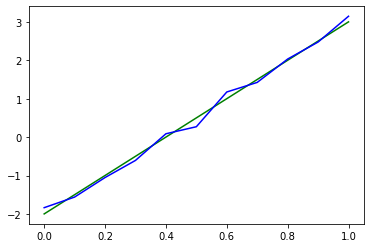

In [7]:
sns.lineplot(x = xes, y = target_ys, color = 'g')
sns.lineplot(x = xes, y = noisy_target_ys, color = 'b')

## Lin Reg SKlearn

In [8]:
from sklearn.linear_model import LinearRegression

X = xes.reshape((-1,1))
reg = LinearRegression().fit(X,target_ys)
print('Linear coef:', reg.coef_, reg.intercept_)

Linear coef: [5.] -2.000000000000001


In [9]:
reg = LinearRegression().fit(X, noisy_target_ys)
print('Linear coef:', reg.coef_, reg.intercept_)

Linear coef: [5.04257197] -2.0168250867454875


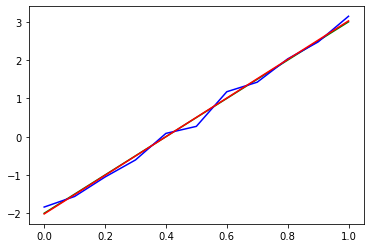

In [10]:
regression_pred = reg.predict(X)
sns.lineplot(x = xes, y= target_ys, color = 'g')
sns.lineplot(x = xes, y= noisy_target_ys, color = 'b')
sns.lineplot(x = xes, y= regression_pred, color = 'r')

In [11]:
class OwnLinearRegression:
    def __init__(self, k = 5, b = -2):
        self.k = k
        self.b = b
    def predict(self, X):
        return [x* self.k + self.b for x in X]

In [12]:
lin_reg = OwnLinearRegression()
lin_reg_pred = lin_reg.predict(np.array([xes]))
print(lin_reg_pred)
print(target_ys)

[array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ])]
[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]


In [50]:
class OwnLinearRegressionLS:
    def __init__(self, k = 5, b = -2):
        self.k = k
        self.b = b
    def predict(self, X):
        return [x* self.k + self.b for x in X]
    def fit(self, X,Y):
        N = len(X)
        sumX = X.sum()
        sumY = Y.sum()
        sumXSquares = np.sum(X**2)
        sumXprodY = np.sum(X * Y)
        
        self.k = (sumXprodY - sumX * sumY /N) / \
        (sumXSquares - sumX * sumX / N)
        
        self.b = np.sum(Y - self.k*X)/ N

In [ ]:
lin_reg = OwnLinearRegressionLS(1,1)
print('Predict' , lin_reg.predict(np.array([2])))

lin_reg.fit(xes, noisy_target_ys)
print(lin_reg.k , lin_reg.b)
print('Predict' , lin_reg.predict(np.array([2])))



# Regressor with gradient dec

In [42]:
np.random.seed(1)

In [33]:
def linear_func(x):
    
    target_k = 5
    target_b = -2
    return target_k * x + target_b

In [34]:
xes = np.linspace(0, 1, 11)

print(xes)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [35]:
target_ys = np.array([linear_func(x) for x in xes])
print(target_ys)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]


In [36]:
noise = np.random.normal(0, 0.1, 11)
noisy_target_ys = target_ys + noise

print(noisy_target_ys)

[-1.83756546 -1.56117564 -1.05281718 -0.60729686  0.08654076  0.26984613
  1.17448118  1.42387931  2.03190391  2.47506296  3.14621079]


In [37]:
def MSE_loss(target, predict):
    return ((target - predict)**2).mean()

In [38]:
class OwnLinearRegressionGD:
    def __init__(self, k=1, b=1):
        self.lr = 0.03 
        self.n_iter = 1500
        self.coef_ = None
        self.intercept_ = None
        self.W = np.array([b, k])

    def calc_loss(self, X, Y):
        X_full = np.c_[np.ones(X.shape[0]), X]
        return MSE_loss(Y, X_full @ self.W)

    def calc_grad(self, X, Y):
        return 2 / X.shape[0] * (X.T @ ((X @ self.W) - Y))

    def predict(self, X):
        X_full = np.c_[np.ones(X.shape[0]), X]
        return X_full @ self.W

    def fit(self, X, Y):
        X_full = np.c_[np.ones(X.shape[0]), X]
        self.W = np.random.rand((X_full.shape[1]))
        for _ in range(self.n_iter):
            self.W = self.W - self.lr * self.calc_grad(X_full, Y)
        self.coef_ = self.W[1:]
        self.intercept_ = self.W[:1]
        print(self.coef_, self.intercept_)

In [40]:
lin_reg = OwnLinearRegressionGD(1, 1)

print("Predict = ",lin_reg.predict(np.array([2])))
X = xes.reshape((-1, 1))
lin_reg.fit(X, noisy_target_ys)

print("Predict = ",lin_reg.predict(np.array([2])))

print(lin_reg.calc_loss(X, noisy_target_ys))

Predict =  [3.]
[5.03898573] [-2.01487888]
Predict =  [8.06309257]
0.01472246058649575


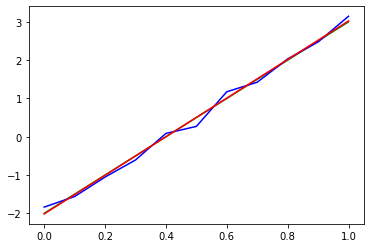

In [41]:
GDRegression_predict = [lin_reg.predict(np.array([x]))[0] for x in xes]
sns.lineplot(x = xes, y = target_ys, color = "g")
sns.lineplot(x = xes, y = noisy_target_ys, color = "b")
sns.lineplot(x = xes, y = GDRegression_predict, color = "r")

In [45]:
np.random.seed(2)

In [46]:
def linear_func(x):
    
    target_k = 2
    target_b = 9
    return target_k * x + target_b

In [47]:
xes = np.linspace(0,1,11)
print(xes)
target_ys = np.array([linear_func(x) for x in xes])
print(target_ys)
noise = np.random.normal(0,0.1,11)
noisy_target_ys = target_ys + noise
print(noisy_target_ys)


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[ 9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11. ]
[ 8.95832422  9.19437332  9.18638039  9.76402708  9.62065644  9.91582526
 10.25028814 10.27547119 10.49420478 10.70909924 11.0551454 ]


In [48]:
lin_reg = OwnLinearRegressionGD(1, 1)

print("Predict = ",lin_reg.predict(np.array([5])))
X = xes.reshape((-1, 1))
lin_reg.fit(X, noisy_target_ys)

print("Predict = ",lin_reg.predict(np.array([5])))

print(lin_reg.calc_loss(X, noisy_target_ys))

Predict =  [6.]
[2.01291931] [8.94106844]
Predict =  [19.00566497]
0.011252953312742876


In [51]:
lin_reg = OwnLinearRegressionLS(1,1)
print('Predict' , lin_reg.predict(np.array([5])))

lin_reg.fit(xes, noisy_target_ys)
print(lin_reg.k , lin_reg.b)
print('Predict' , lin_reg.predict(np.array([5])))

Predict [6]
2.010818428651847 8.942208555024637
Predict [18.99630069828387]


# Neuron

In [55]:
class OneLinearLearnableNeuron:
    
    def __init__(self, w,b):
        self.w = np.array(w)
        self.b = np.array(b)
        
        self.n_iter = 500
        self.lr = 0.1
        
    def calc_grad_w(self, x,y):
        '''Derivatives of W in current x by W'''
        return -2 * np.array(y) @ np.array(x) + \
        2 * (self.w @ np.array(x) + self.b) @ np.array(x).T
    
    def calc_grad_b(self, x,y):
        '''Derivatives of W in current x by b'''
        return -2 * np.array(y) + 2 * (self.w @ np.array([x]) + self.b)
    
    def calc_loss(self, target, predict):
        return MSE_loss(np.array(target).reshape(1, -1),\
                        np.array(predict).reshape(1, -1))
    
    def apply(self,x):
        return self.w * np.array(x) + self.b
        
    def train(self, x, y):
        loss_hist = []
        for i in range(self.n_iter):
            current_predict = [self.apply(np.array(item)) for item in x]
            loss_hist.append(self.calc_loss(current_predict, y))
            for item in range(len(x)):
                self.w = self.w - \
                self.lr * self.calc_grad_w([x[item]], [y[item]]) / len(x)
                self.b = self.b - \
                self.lr * self.calc_grad_b([x[item]], [y[item]]) / len(x)
        return loss_hist

    def print_weights(self):
        print('Neuron: w = {}, b = {}'.format(self.w, self.b))

array([4, 5, 5])

In [56]:
neuron = OneLinearLearnableNeuron([3], [0])

print(neuron.apply([0]))

print(neuron.calc_grad_w([0], [-2]))
print(neuron.calc_grad_b([0], [-2]))

[0]
0
[4]


[8.99999973]
Neuron: w = [2.00000048], b = [8.99999973]


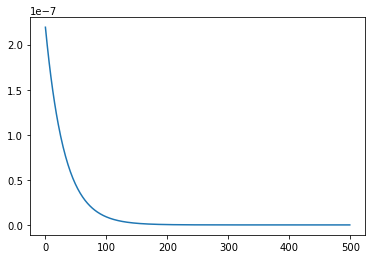

In [58]:
losses = neuron.train(xes, target_ys)
sns.lineplot(
    data=losses
)
print(neuron.apply([0]))

neuron.print_weights()

Зафиксируйте np.random.seed(3), сгенерируйте новую выборку для функции y=-x+2 и обучите 50 итераций с lr=0.3 , а потом ещё 50 с lr 0.1 .

В ответ запишите predict при  с точностью до сотых, не округляя.

In [59]:
np.random.seed(3)

In [60]:
def linear_func(x):
    
    target_b = 2
    return - x + target_b

In [61]:
xes = np.linspace(0,1,11)
print(xes)
target_ys = np.array([linear_func(x) for x in xes])
print(target_ys)
noise = np.random.normal(0,0.1,11)
noisy_target_ys = target_ys + noise
print(noisy_target_ys)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[2.  1.9 1.8 1.7 1.6 1.5 1.4 1.3 1.2 1.1 1. ]
[2.17886285 1.94365099 1.80964975 1.51365073 1.57226118 1.4645241
 1.39172585 1.23729993 1.19561818 1.0522782  0.86861352]


In [69]:
class OneLinearLearnableNeuron:
    
    def __init__(self, w,b):
        self.w = np.array(w)
        self.b = np.array(b)
        
        self.n_iter = 101
        self.lr_1 = 0.3
        self.lr_2 = 0.1
        
    def calc_grad_w(self, x,y):
        '''Derivatives of W in current x by W'''
        return -2 * np.array(y) @ np.array(x) + \
        2 * (self.w @ np.array(x) + self.b) @ np.array(x).T
    
    def calc_grad_b(self, x,y):
        '''Derivatives of W in current x by b'''
        return -2 * np.array(y) + 2 * (self.w @ np.array([x]) + self.b)
    
    def calc_loss(self, target, predict):
        return MSE_loss(np.array(target).reshape(1, -1),\
                        np.array(predict).reshape(1, -1))
    
    def apply(self,x):
        return self.w * np.array(x) + self.b
        
    def train(self, x, y):
        loss_hist = []
        for i in range(self.n_iter):
            if i <= 50:
                current_predict = [self.apply(np.array(item)) for item in x]
                loss_hist.append(self.calc_loss(current_predict, y))
                for item in range(len(x)):
                    self.w = self.w - \
                    self.lr_1 * self.calc_grad_w([x[item]], [y[item]]) / len(x)
                    self.b = self.b - \
                    self.lr_1 * self.calc_grad_b([x[item]], [y[item]]) / len(x)
            else:
                current_predict = [self.apply(np.array(item)) for item in x]
                loss_hist.append(self.calc_loss(current_predict, y))
                for item in range(len(x)):
                    self.w = self.w - \
                    self.lr_2 * self.calc_grad_w([x[item]], [y[item]]) / len(x)
                    self.b = self.b - \
                    self.lr_2 * self.calc_grad_b([x[item]], [y[item]]) / len(x)
        return loss_hist

    def print_weights(self):
        print('Neuron: w = {}, b = {}'.format(self.w, self.b))

In [70]:
neuron = OneLinearLearnableNeuron([3], [0])

print(neuron.apply([3]))

print(neuron.calc_grad_w([0], [-2]))
print(neuron.calc_grad_b([0], [-2]))

[9]
0
[4]


[-0.66218522]


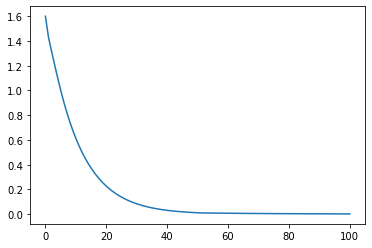

In [71]:
losses = neuron.train(xes, target_ys)
sns.lineplot(
    data=losses
)
print(neuron.apply([3]))
